##### Data Analysis 2022 - Coursework 2 (50%)
# Analysing gravitational wave signals 
## Deadline Friday week 11, 2pm.

#### Instructions

This coursework assesses learning outcomes from **all Chapters** of the course, but in particular **Chapters 6, 7, 8 and 9**. It is worth 50% of the module. Please ensure you have read the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2022/blob/master/blended_exercises/Chapter8/Chapter8.ipynb) before starting this coursework. 

**These assessments are equivalent to an exam**:
- Submit your work via Turn-It-In on Learning Central. Note that you will need to upload your final notebook exported as a html file. **Don't forget to click `run all` before you export it**. You can constantly update this document until the deadline.
- The breakdown of the assessment criteria is provided in Learning Central under Assessment.
- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer.
- Please also take note of the University’s policy on **plagiarism**, which is outlined in your student handbook.

#### Tips


- Explain all your reasoning for each step. A *significant fraction* of the marks are given for explanations and discussion, as they evidence understanding of the analysis.  
- Some of these steps will take a while to run and compile. It's a good idea to add in print statements to your code throughout eg `print('this step is done')` to make sure that your bit of code has finished.
- Add the import packages statements at the top of your Jupyter notebook. We will use the `pandas` package to read in the data, with eg `dataIn=pd.read_csv('filename.csv')`.
- You may need to do some additional research into this subject. You may find it useful to look at the following publication from the LIGO consortium. https://arxiv.org/pdf/1608.01940.pdf

***

Gravitational waves are disturbances in the curvature of spacetime, generated by accelerated masses, that propagate as waves outward from their source at the speed of light.  They are predicted in General Relativity and other theories of gravity and since 2017, they have now been observed!

In this exercise we will analyse some mock gravitational wave data from two unknown astrophysical objects merging together and coelescing. We will use a Monte Carlo Markov Chain (MCMC) to compare a scaled model that predicts how the wave changes depending on the total mass of the merging objects and their distance from us to the observed waveform.  This will allow us to determine the nature of the orbiting objects that merged to form the gravitational wave using MCMC, whether for instance they could be originating from merging white dwarfs, neutron stars or black holes.

The mock or simulated waveforms measure the strain as two compact, dense astrophysical objects coalesce. The strain describes the amplitude of the wave. The system is parameterised by the masses of the merging objects, $M_1$ and $M_2$, and their distance from the observer $D$.  

Other useful parameters and equations relevant for this assessment are given in the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter8/Chapter8.ipynb).

***

# Importing required packages:

In [1]:
#Importing packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from IPython.display import Image
from scipy.stats import norm

#Stating plot formats
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 14})

1. How do astronomers know that the gravitational waves from the GW150914 event were due to two black holes merging? <div align="right">**[2 marks]**</div>

## Answer:

Waveform analysis. Model waveforms, or templates, are used in an attempt to determine which parameter characteristics correctly describe the event objects. For example, two black holes merging will fit different mass parameter templates than two neutron stars merging due to the difference in known mass bounds.

2. Describe the different parts of the waveform produced due to gravitational waves from a merging black hole event.   <div align="right">**[3 marks]**</div>

## Answer:

The three waveform parts are the inspiral, merger and ring-down.

### **Inspiral**

The objects orbiting each other begin to draw closer as the orbit frequency increases - strain amplitude also increases.

### **Merger**

The objects begin their collision - a peak in both strain amplitude and orbit frequency can be seen.

### **Ring-down**

The post-merger resultant object settles to a stationary state. Strain amplitude returns to ~0.

Below shows the three stages in relation to the waveform. The lower, smaller graph is irrelevant here, but the x axis is the same as the top graph. Source: https://arxiv.org/ftp/arxiv/papers/1602/1602.03837.pdf

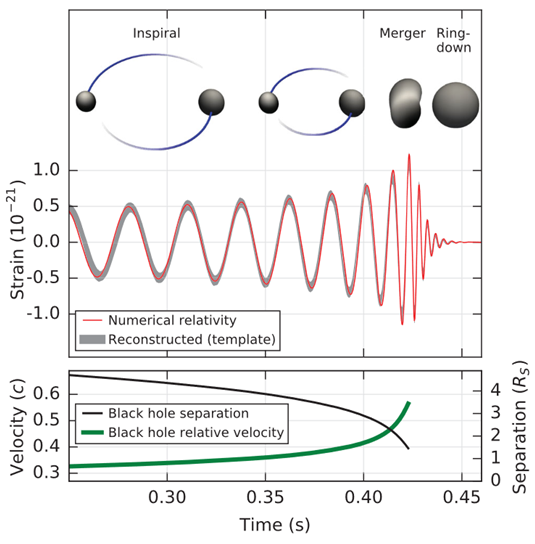

In [2]:
Image('CA2/Picture5.png')

3. The file ``gravitationalwaveevents.csv`` contains the properties of previously observed gravitational waves. Ultimately, we will aim to compare your merger event results with the properties from previously observed gravitational waves. Parameters obtained for these systems are known as posteriors as they are derived using Bayes Theorem (ie posterior = likelihood $\times$ prior). The errors in these values are the credible intervals from the posterior distribution derived for each parameter. Plot the **total** mass (given in solar masses, $\rm 1M_{\odot} = 1.99 \times 10^{30}\,kg$) of the merging sources against their distance (given in units of Mpc, $\rm 1\,pc = 3 \times 10^{16}m$).   <div align="right">**[10 marks]** </div>

## Answer:

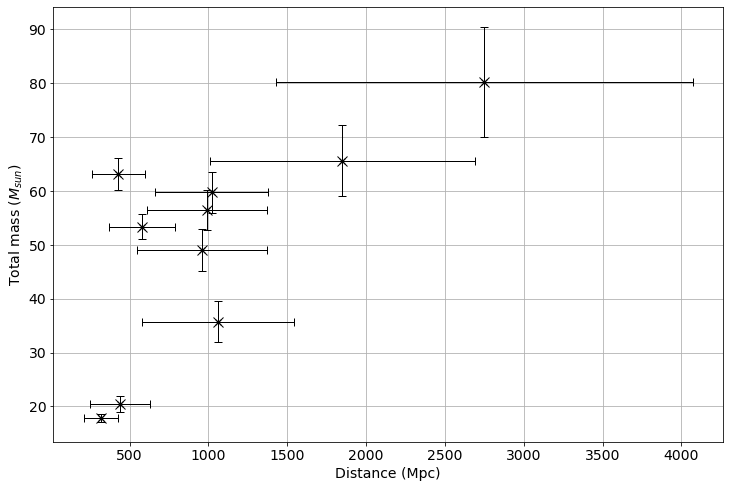

In [3]:
#Reading dataframe
gwevents = pd.read_csv('CA2/gravitationalwaveevents.csv')

#Considering only the sources with determined total mass values
newgw = gwevents.dropna()

#Separating the new dataframe and formatting errors into 1D arrays
distance = newgw[['DL']].to_numpy()
dist_err = newgw[['DL_err']].to_numpy().flatten()
mtot = newgw[['Mtot']].to_numpy()
mtot_err = newgw[['Mtot_err']].to_numpy().flatten()


#plotting
plt.figure(1)
plt.plot(distance, mtot, 'kx', markersize=10)
plt.errorbar(distance, mtot, yerr = mtot_err, xerr=dist_err, fmt='kx', elinewidth = 1, capsize = 4)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Total mass ($M_{sun}$)')
plt.grid()

The graph above is relatively simple. It shows the relationship between the total mass of the merger sources and the distance of them from Earth. Just by eye, you can see that as the distance increases, it becomes less precise and the error increases. You can also see a similar trend with the masses. To look at these relationships in more detail, you can plot the distance error against the distance as well as the mass error against the total mass:

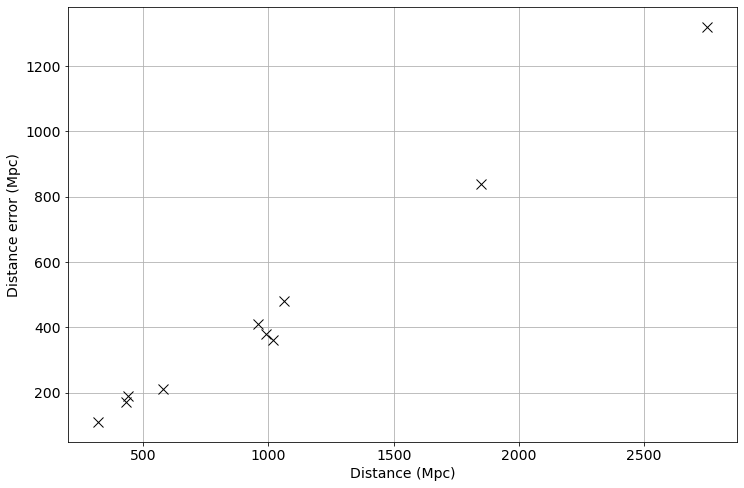

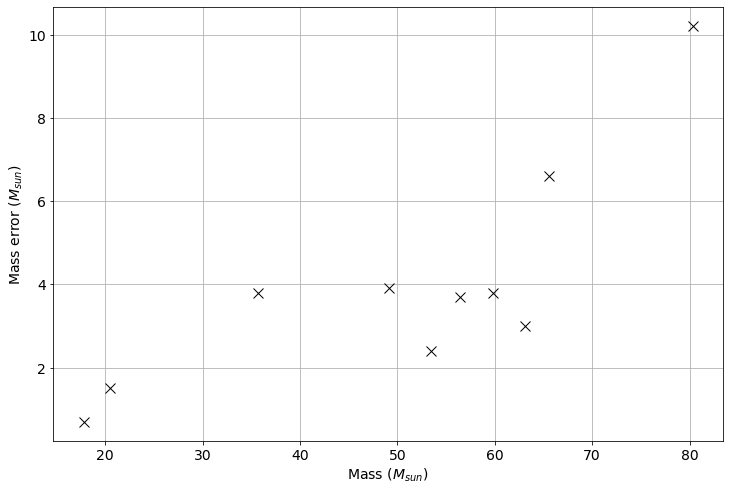

In [4]:
plt.figure(2)
plt.plot(distance, dist_err, 'kx', markersize = 10)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Distance error (Mpc)')
plt.grid()

plt.figure(3)
plt.plot(mtot, mtot_err, 'kx', markersize = 10)
plt.xlabel('Mass ($M_{sun}$)')
plt.ylabel('Mass error ($M_{sun}$)')
plt.grid()

These graphs give a much better visualisation of the inverse proportionality between the magnitude of mass and distance and their respective errors. Granted the mass - mass error relationship isn't as clear cut, but both can still be used to suggest that precision of these gravitational wave detections decreases with the increase in distance. (Mass is roughly proportional to distance due to smaller mass systems being harder to detect from far away).

***

## Part B - The data 

Now it is your turn to look at observations and measure the mass and distance of the merging system. We first need to access the observational data measured with the gravitational wave detectors (the waveform observed when two compact, dense astrophysical objects coalesce), and format it correctly.

1. Read in the datafile of the observed waveform `Observedwaveform.csv`. These files store the strain as a function of "GPS time" for the merger of two bodies. <div align="right">**[5 marks]**</div>

## Answer:

First, I want to just read in the raw file:

In [5]:
#Reading in the data frame
obswave = pd.read_csv('CA2/Observedwaveform.csv')

Now let's see what headers this file includes:

In [6]:
print('The headers in this DataFrame are', obswave.columns)

The headers in this DataFrame are Index(['strain', 'time (s)'], dtype='object')


So the observed waveform data includes information on the strain and the time for a gravitational wave event. Knowing this, I can expect a graph of the strain plotted against time to look similar to this:

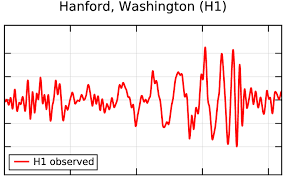

In [7]:
Image('CA2/waveform.png')

Let's test this:

First, I will isolate the two variables and make them into arrays...

In [8]:
strain = obswave[['strain']].to_numpy()
time = obswave[['time (s)']].to_numpy()

Then plot strain against time.

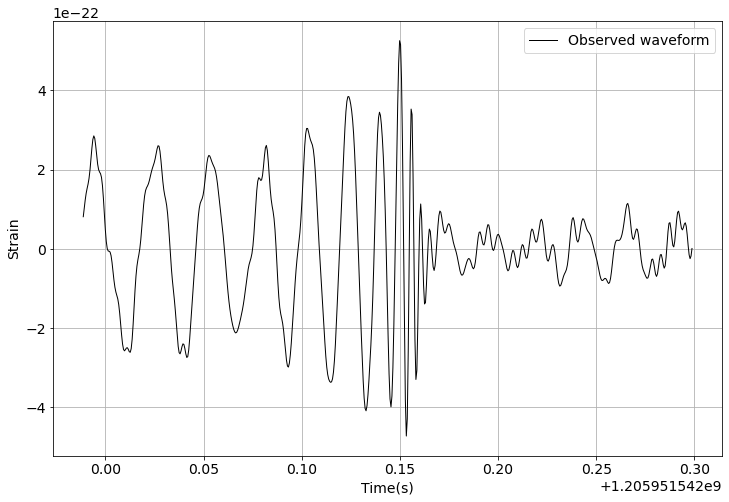

In [9]:
plt.figure(4)
plt.plot(time, strain, 'k-', linewidth = 1, label = 'Observed waveform')
plt.xlabel('Time(s)')
plt.ylabel('Strain')
plt.legend(loc = 'best')
plt.grid()

As expected, the data produces a waveform that is recognisable as a GW event.

2. The GPS time of the merger for your waveform is 1205951542.153363.  Your data will need to be shifted so that the merger occurs at time = 0 secs.  This is required for when we compare model waveforms with our data as the model waveforms are simulated with the merger at t=0s.   <div align="right">**[4 marks]**</div>

## Answer:

The time given for the merger can be used to shift the data. The given time should be subtracted from all of the time values to shift it in a way that gives the merger to be at t = 0 seconds.

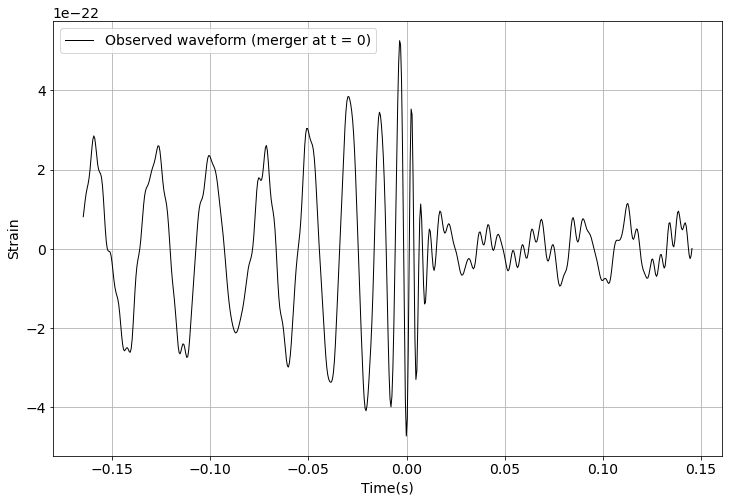

In [10]:
offset = 1205951542.153363

time = time - offset

plt.figure(5)
plt.plot(time, strain, 'k-', linewidth = 1, label = 'Observed waveform (merger at t = 0)')
plt.xlabel('Time(s)')
plt.ylabel('Strain')
plt.legend(loc = 'best')
plt.grid()

The merger has now been shifted to t = 0, as required.

3. We need to estimate the average noise and its standard deviation in our data. This requires careful thought about where the noise can be seen in the waveform.   <div align="right">**[6 marks]**</div>
## Answer:

The best place to look at for noise is after the ringdown. If the data was completely noiseless, there would be no strain after the objects merge. The event truly ends at around t = 0.015 (by eye).

To plot only the time after t = 0.015, the first step is to determine how many data points lie *after* this point:

In [11]:
#Finding number of points with t > 0.015:
n = 0
for i in range(len(time)):
    if time[i] > 0.015:
        n = n + 1
print('The number of points corresponding to a time greater than 0.015s is', n)

The number of points corresponding to a time greater than 0.015s is 268


So there are 268 points that occur after t = 0.015s. From there, I can figure out the range of indexes that correspond to t > 0.015s for both time and strain:

In [12]:
lent = len(time)
noisestart = lent - n
noiset = time[noisestart:]
noises = strain[noisestart:]


And plotting this:

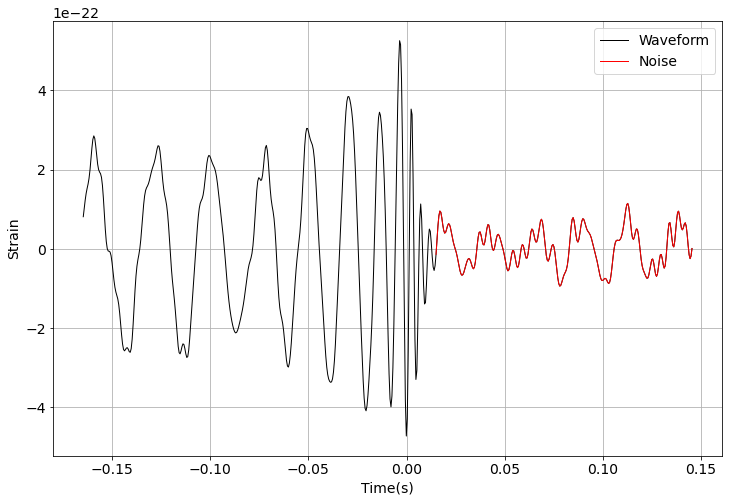

In [13]:
#Plotting
plt.figure(6)
plt.plot(time, strain, 'k-', linewidth = 1, label = 'Waveform')
plt.plot(noiset, noises, 'r-', linewidth = 1, label = 'Noise')
plt.xlabel('Time(s)')
plt.ylabel('Strain')
plt.grid()
plt.legend(loc = 'best')

So the highlighted section of the waveform is essentially just noise. Taking a closer look:

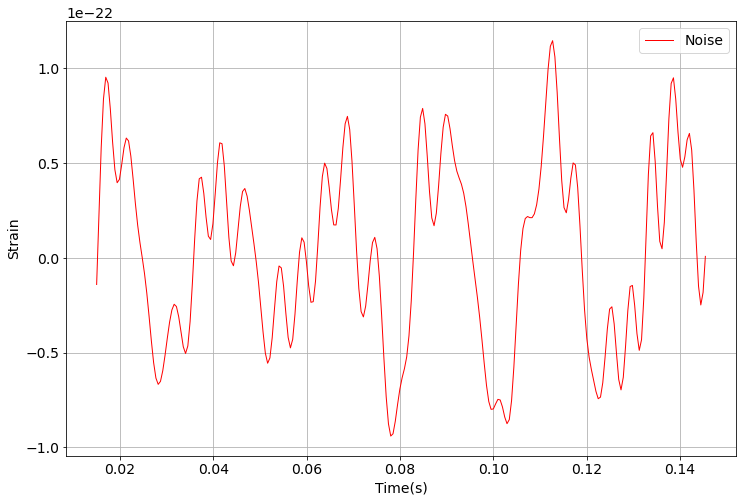

In [14]:
plt.figure(7)
plt.plot(noiset, noises, 'r-', linewidth = 1, label = 'Noise')
plt.xlabel('Time(s)')
plt.ylabel('Strain')
plt.grid()
plt.legend(loc = 'best')

Next, the mean strain amplitude in this section needs to be determined, as well at the standard deviation:

In [15]:
avgnoise = np.mean(noises)
stdnoise = np.std(noises)
print('The average noise is %.5e.' % avgnoise)
print('The standard deviation is %.5e.' % stdnoise)

The average noise is 3.69626e-24.
The standard deviation is 4.84855e-23.


Adding these to the plot:

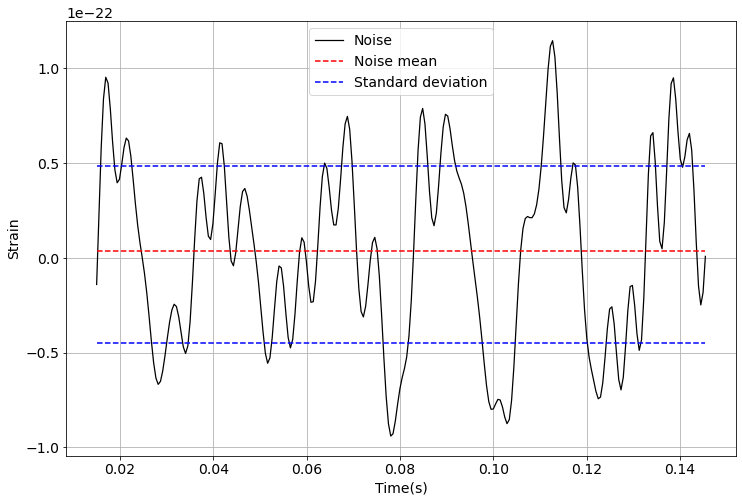

In [16]:
avg = np.zeros(len(noiset))
stdev = np.zeros(len(noiset))
for i in range(0, len(noiset)):
    avg[i] = avgnoise

for j in range(0, len(noiset)):
    stdev[j] = stdnoise

plt.figure(8)
#Plotting the waveform data:
plt.plot(noiset, noises, 'k-', linewidth = 1.25, label = 'Noise')
#Plotting the mean:
plt.plot(noiset, avg, 'r--', linewidth = 1.5, label = 'Noise mean')

#Plotting the standard deviation above and below the mean:
plt.plot(noiset, stdev, 'b--', linewidth = 1.5, label = 'Standard deviation')
plt.plot(noiset, (-1) * (stdev - avg), 'b--', linewidth = 1.5)

plt.xlabel('Time(s)')
plt.ylabel('Strain')
plt.grid()
plt.legend(loc = 'best')

Now showing this on the full waveform graph:

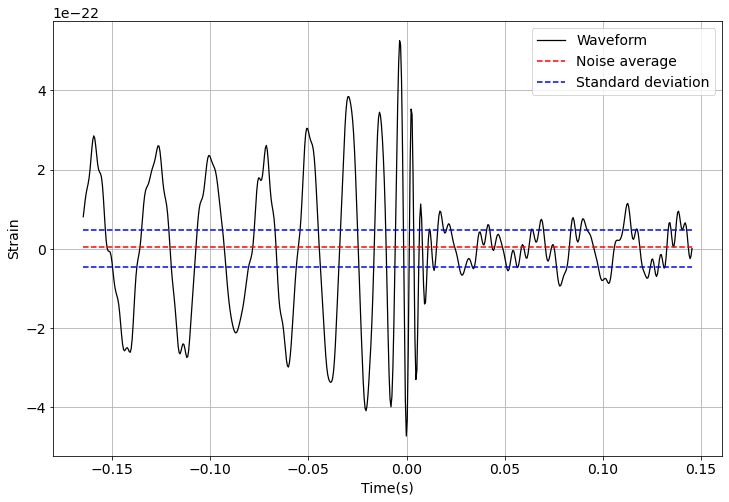

In [17]:
avg_full = np.zeros(len(time))
stdev_full = np.zeros(len(strain))
for i in range(0, len(time)):
    avg_full[i] = avgnoise

for j in range(0, len(time)):
    stdev_full[j] = stdnoise


plt.figure(9)
#Plotting the waveform data:
plt.plot(time, strain, 'k-', linewidth = 1.25, label = 'Waveform')
#Plotting the mean:
plt.plot(time, avg_full, 'r--', linewidth = 1.5, label = 'Noise average')

#Plotting the standard deviation above and below the mean:
plt.plot(time, stdev_full, 'b--', linewidth = 1.5, label = 'Standard deviation')
plt.plot(time, (-1) * (stdev_full - avg_full), 'b--', linewidth = 1.5)

plt.xlabel('Time(s)')
plt.ylabel('Strain')
plt.grid()
plt.legend(loc = 'best')

Most of the noise is within 1 standard deviation from the mean. In addition, its proportion in comparison to the merger event readings shows that the waveform is *not* dominated by noise - which is a good thing.

***

## Part C - Interpolate reference model to match the observed data time sampling 

In this part of the question we will learn to match the time samples between a reference waveform (eg one generated by a model) and a mock data waveform, so they can be directly compared. We need to do this so that in Part D onwards we can compare our observations (Observedwaveform.csv) to our expectations (a reference waveform with different values of $M$ and $D$). 

The reference waveform we will use assumes $M=40 M_{sun}$, $D=1$Mpc and $q=M_2/M_1 = 1$ and is named ```reference_Mtot40Msun_Dist1Mpc.csv```.  

You will also find some "mock data" for the same mass and distance in the file `mockData_Mtot40Msun_Dist1Mpc.csv` (which has $t=0$ at the merger, just like the reference waveform).

Now that we have some mock data and a reference waveform, we need to do one more fix.  Currently the data waveforms and our reference waveforms have different sampling on the $x$ axis - ie they have different values of $x$ (time). The reference waveforms have approx 20,000+ time steps, yet our data has less than hundreds of data points in the same time range! We need to try and match the $x$ times up so that for each value of $x$ we can compare the $y$ values from our observations (the observed strain) with the $y$ values from the reference waveform.

We need to only consider the times when we have observed data, so we will trim our other datasets.

1.  Open the mock data file using the `pandas` package. Our data waveform starts at some time $t_{\rm min}$. Find out what this is.  Next, take your observed data waveform and output data for $t$ > $t_{\rm min}$ and $t$ < $0$ (ie only keep information for times $\le 0$ (before the merger), or for times where there is data).  Verify, by plotting, that your new observed waveform only has data in this restricted time range. <div align="right">**[5 marks]**</div>

## Answer:

The first step is to read in the mock data. I will also print out the headings:

In [18]:
mock_40_1 = pd.read_csv('CA2/mockData_Mtot40Msun_Dist1Mpc.csv')
print('The headers in this DataFrame are', mock_40_1.columns)

The headers in this DataFrame are Index(['strain', 'time (s)'], dtype='object')


So again, this DataFrame includes the necessary information to plot a waveform graph.

I will plot to confirm, but first I need to separate the columns and convert them into arrays (this makes them easier to handle):

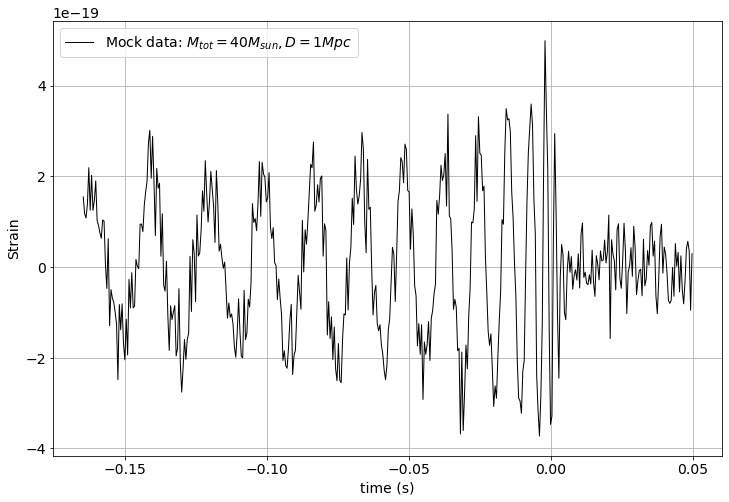

In [19]:
mockstrain = mock_40_1[['strain']].to_numpy()
mocktime = mock_40_1[['time (s)']].to_numpy()

plt.figure(10)
plt.plot(mocktime, mockstrain, 'k-', linewidth = 1, label = 'Mock data: $M_{tot} = 40M_{sun}, D = 1Mpc$')
plt.xlabel('time (s)')
plt.ylabel('Strain')
plt.legend(loc = 'best')
plt.grid()

Now, I need to plot all the data ***before*** the merger, so before t = 0.

To do this, I need to create two new arrays with only the pre-merger times and strains:

In [20]:
#These two lines tell Python that the variables are arrays, as well as inputting the first value
premerger = [0]
premerger[0] = mocktime[0]

for i in range(1, len(mocktime)):
    if mocktime[i] < 0:
        premerger.append(mocktime[i])
        
pre_len = len(premerger)
print('The number of points before the merger (t = 0) is', pre_len)

The number of points before the merger (t = 0) is 338


So the time has been sliced to only include before the merger. Now for the corresponding strain values:

In [21]:
prestrain = np.zeros(pre_len)
for j in range(0, len(prestrain)):
    prestrain[j] = mockstrain[j]

And finally, plotting:

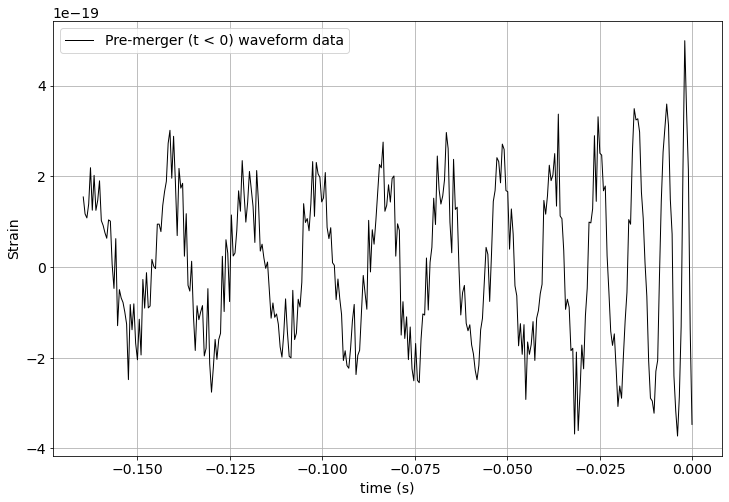

In [22]:
plt.figure(11)
plt.plot(premerger, prestrain, 'k-', linewidth = 1, label = 'Pre-merger (t < 0) waveform data')
plt.xlabel('time (s)')
plt.ylabel('Strain')
plt.legend(loc = 'best')
plt.grid()

The above graph confirms that the data plotted is only within this restricted time range.

2. Open the reference file using the `pandas` package. We want to convert our reference waveform to have the same time sampling, ie the same number of $x$ data points as our data (in this question, our mock data).  We need to interpolate the reference waveform to match the time samples of the data. To do this use the following code:

    assuming `ref_x[index]` and `ref_y[index]` are the reference data (time and strain respectively) and `data_x` is the observed data you wish to match the $x$ axis for (this would be mock_x for this question):

```
from scipy.interpolate import interp1d

# get interpolation object using a reference waveform with ref_x (time) and ref_y (strain).
interp_fn = interp1d(ref_x[index],ref_y[index],bounds_error=False)

# now interpolate the data waveform 
interp_strain = interp_fn(data_x)

# plot
plt.plot(data_x,interp_strain)
```

Briefly verify that this works. <div align="right">**[10 marks]**</div>

_Hints:_

- *One can use the following code example to pull out bits of data `index = np.where((data > 5)&(data < 10))[0]`. This type of statement returns a list of indices (`index`) where the conditions in the bracket have been met.  `data[index]` pulls out `data` that satisfy the conditions in the brackets above.*

## Answer:

First, opening the reference file and printing the headings:

In [23]:
ref_40_1 = pd.read_csv('CA2/reference_Mtot40Msun_Dist1Mpc.csv')
print('The headers in this DataFrame are', ref_40_1.columns)

The headers in this DataFrame are Index(['strain', 'time (s)'], dtype='object')


Now, again, isolating the variables and converting to numpy arrays, then plotting to take a look at the data:

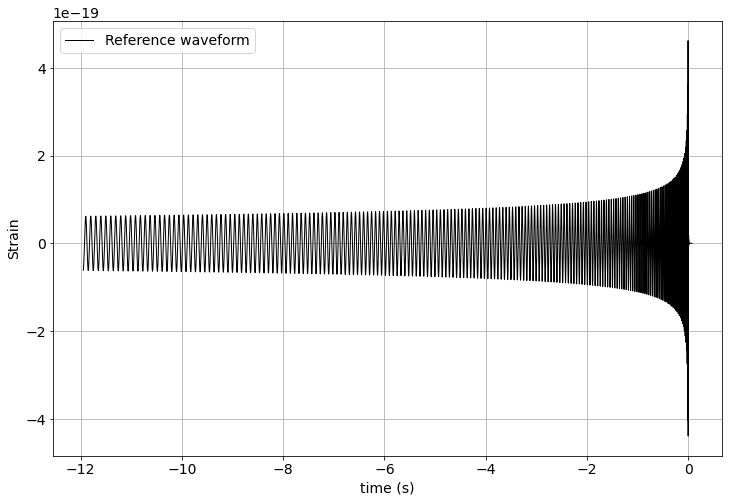

In [24]:
refstrain = ref_40_1[['strain']].to_numpy().flatten()
reftime = ref_40_1[['time (s)']].to_numpy().flatten()
plt.figure(12)
plt.plot(reftime, refstrain, 'k-', linewidth = 1, label = 'Reference waveform')
plt.xlabel('time (s)')
plt.ylabel('Strain')
plt.legend(loc = 'best')
plt.grid()

This data looks noiseless... a perfect waveform.

Now to interpolate:

In [25]:
#getting interpolation object using a reference waveform:
interp_fn = interp1d(reftime,refstrain,bounds_error=False)

#interpolating:
interp_strain = interp_fn(mocktime)

And plot:

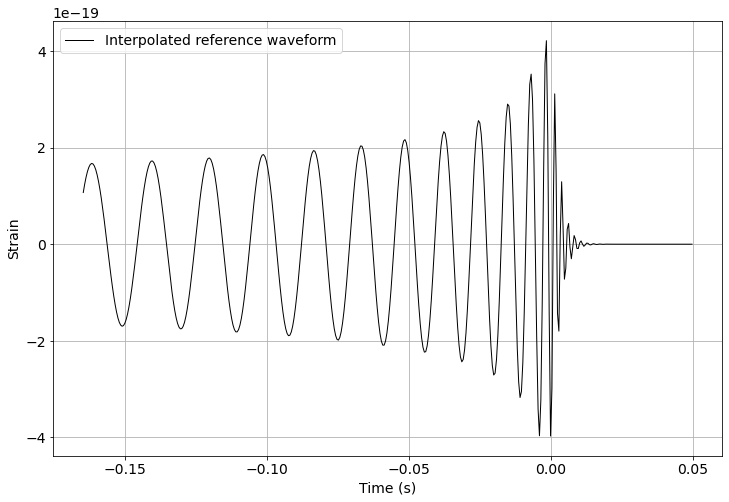

In [26]:
plt.figure(13)
plt.plot(mocktime,interp_strain, 'k-', linewidth = 1, label = 'Interpolated reference waveform')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend(loc = 'best')
plt.grid()

The interpolated reference waveform actually justifes my use of t > 0.015s for the noise in part B; this waveform is noiseless so shows the true end of the ringdown, which lies very close to t = 0.015s. 

Overlaying this new graph onto the mock data gives:

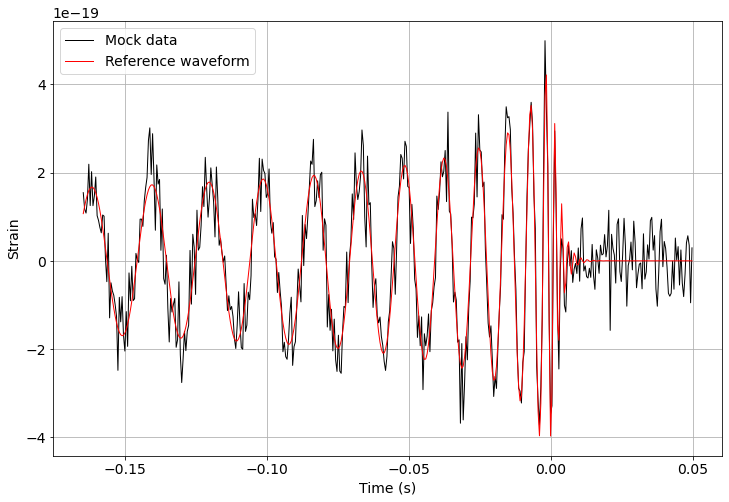

In [27]:
plt.figure(14)
plt.plot(mocktime, mockstrain, 'k-', linewidth = 1, label = 'Mock data')
plt.plot(mocktime,interp_strain, 'r-', linewidth = 1, label = 'Reference waveform')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.grid()
plt.legend(loc = 'best')

The above graph shows the reference waveform has been interpolated correctly as the reference waveform seems to match the mock data relatively well.

***

## Part D - Using model waveforms to estimate the total mass and distance to the system "a by-eye estimate") 

In this part of the question we will attempt to produce a waveform for any mass and distance values using the reference waveform with $M=40 M_{sun}$, $D=1$Mpc and $q=M_2/M_1 = 1$ and scaling it by any new mass and distance. 

The reference waveform/template we will use is the same as before: ```reference_Mtot40Msun_Dist1Mpc.csv```. 

You will need to follow the steps below when answering this question:

1. Write a function in python to produce the time $t$ and strain $h$ of a general waveform with $q=1$, total mass $M$ and distance $D$ from the interpolation object you created above, using the equations for how the waveform strain and time depends on mass and distance from the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter8/Chapter8.ipynb). <div align="right"> **[10 marks]**</div>

## Answer:

If we have an equal-mass system (i.e $q = \dfrac{M_1}{M_2} = 1$) with total mass $M=M_1 + M_2$ at a distance $D$ (not spinning), then we can scale the strain of a waveform, $h(t,M,D)$ from a reference waveform with $h(t_{\rm {
ref}},M_{\rm {ref}},D_{\rm {ref}})$ as:

$$ t_{\rm {ref}}=\left(\dfrac{M_{\rm {ref}}}{M}\right)t  $$

where $t=0$ is the time at which the merger occurred and

$$ h(t,M,D) = \left(\dfrac{M}{M_{\rm {ref}}}\right) \left(\dfrac{D_{\rm {ref}}}{D}\right) h(t_{\rm {ref}}).$$

Rewriting the first equation gives:

$$t_{\rm{ref}} = \dfrac{M_{\rm{ref}}t}{M},$$

and the second equation can be rewritten as:

$$h(t, M, D) = \dfrac{MD_{\rm{ref}}h(t_{\rm{ref}})}{M_{\rm{ref}}D}.$$

Without interpolation, the function would simply be the following:

```
def th(t_ref, h_ref, M_ref, D_ref, M, D):
    t_ref = (M_ref * t) / M
    h = (M * D_ref * h_ref)/(M_ref * D)
    return t, h
```

However, as the reference waveform needs to be converted to fit the mock data, the function needs to involve interpolation. This comes in with the term $h(t_{\rm{ref}})$:

In [28]:
def scale_fn(M, D, interp_fn, t, t_ref):
    m_ref = 40
    d_ref = 1 
    t_ref = (m_ref * t) / M #This line is also changed slightly to handle the time arrays correctly
    h = (M * d_ref * interp_fn(t_ref))/(m_ref * D) 
    return t, h

2. Test your function works by substituting in values of $M=70\,M_{sun}$ and $D=5$Mpc, and compare your resulting waveform with the mock data in `mockData_Mtot70Msun_Dist5Mpc.csv`.  Comment on your result. <div align="right">**[6 marks]**</div>

## Answer:

First, reading in the CSV and printing the headers:

In [29]:
mock_70_5 = pd.read_csv('CA2/mockData_Mtot70Msun_Dist5Mpc.csv')
print('The headers in this DataFrame are', mock_70_5.columns)

The headers in this DataFrame are Index(['strain', 'time (s)'], dtype='object')


Now, I create separate variables for the strain and time and plot to visualise the waveform:

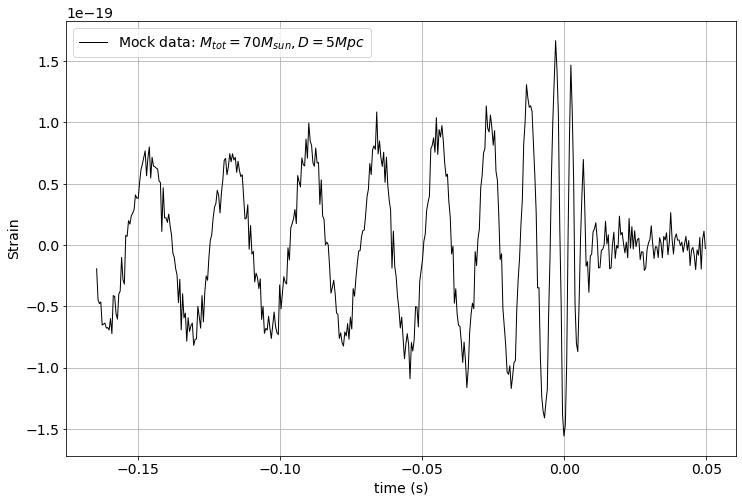

In [30]:
mock70s = mock_70_5[['strain']].to_numpy().flatten()
mock70t = mock_70_5[['time (s)']].to_numpy().flatten()
plt.figure(15)
plt.plot(mock70t, mock70s, 'k-', linewidth = 1, label = 'Mock data: $M_{tot} = 70M_{sun}, D = 5Mpc$')
plt.xlabel('time (s)')
plt.ylabel('Strain')
plt.legend(loc = 'best')
plt.grid()

Next, I call the function I've just created, using $M = 70M_{\rm{sun}}$ and $D = 5Mpc$:

In [31]:
m = 70 #m_sun
d = 5 #Mpc
res_t, res_s = scale_fn(m, d, interp_fn, mock70t, mock70t)

And plotting:

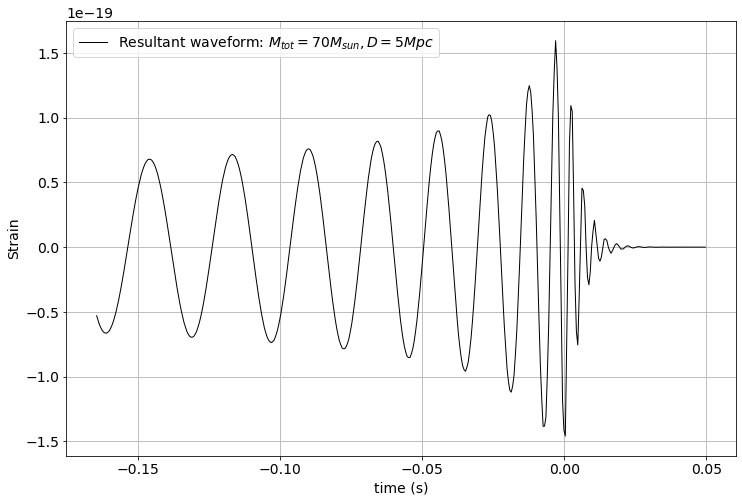

In [32]:
plt.figure(16)
plt.plot(res_t, res_s, 'k-', linewidth = 1, label = 'Resultant waveform: $M_{tot} = 70M_{sun}, D = 5Mpc$')
plt.xlabel('time (s)')
plt.ylabel('Strain')
plt.legend(loc = 'best')
plt.grid()

Overlaying the two shows the comparison between the mock waveform data and the reference waveform data:

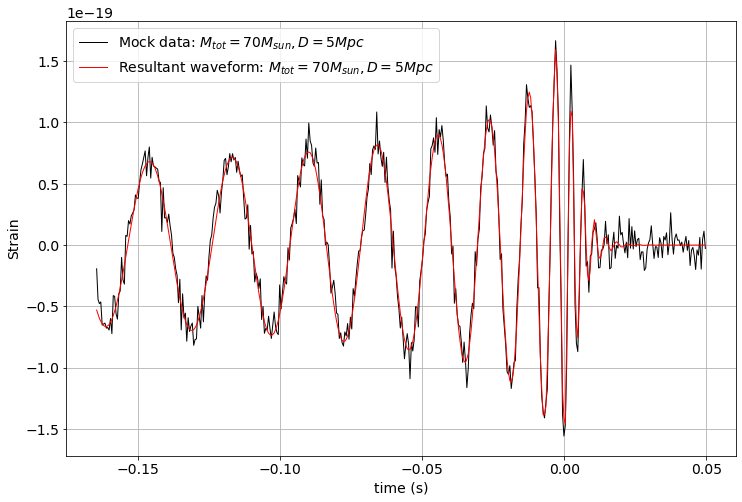

In [33]:
plt.figure(17)
plt.plot(mock70t, mock70s, 'k-', linewidth = 1, label = 'Mock data: $M_{tot} = 70M_{sun}, D = 5Mpc$')
plt.plot(res_t, res_s, 'r-', linewidth = 1, label = 'Resultant waveform: $M_{tot} = 70M_{sun}, D = 5Mpc$')
plt.xlabel('time (s)')
plt.ylabel('Strain')
plt.legend(loc = 'best')
plt.grid()

The interpolated reference waveform overlays the mock data very well. The reference waveform shows what the data *would* look like if there was a perfect detection involving objects with a total mass of 70 solar masses at a distance of 5Mpc.

3. Use your function to scale the reference waveform ($M=40 M_{sun}$, $D=1$Mpc) to make an initial rough estimate "by eye" of the total mass and distance that "best" fits your data (e.g. to within +/- 5 Msun, +/- 100 Mpc). <div align="right">**[8 marks]**</div>

_Hints:_

- As you are creating a function that returns $h$ and $t$ for the reference waveform scaled by $M$ and $D$ as per the Chapter 8 equations, you will need to do the interpolation inside the function.

## Answer:

Plotting the observed waveform, initial scaled reference waveform and the resultant mock waveforms from part D2:

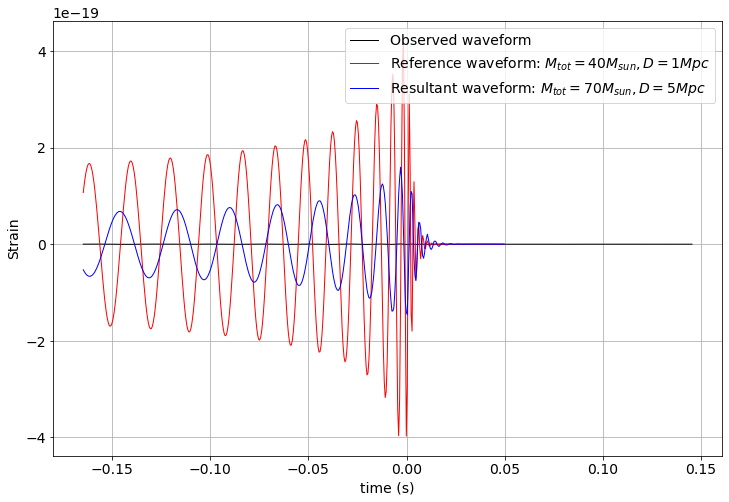

In [34]:
plt.figure(18)
plt.plot(time, strain, 'k-', linewidth = 1, label = 'Observed waveform')
plt.plot(mocktime,interp_strain, 'r-', linewidth = 1, label = 'Reference waveform: $M_{tot} = 40M_{sun}, D = 1Mpc$')
plt.plot(res_t, res_s, 'b-', linewidth = 1, label = 'Resultant waveform: $M_{tot} = 70M_{sun}, D = 5Mpc$')

plt.xlabel('time (s)')
plt.ylabel('Strain')
plt.legend(loc = 'best')
plt.grid()

The observed waveform strain amplitude is so small that it looks like a straight line on this graph. The first step should be to find the correct distance as this affects the strain amplitude. My first estimate will be D = 20Mpc, while keeping M as 70M_sun.

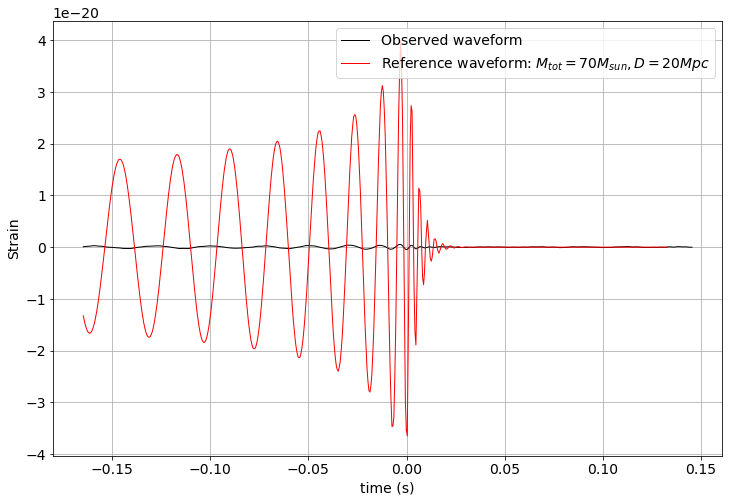

In [35]:
m = 70 #m_sun
d = 20 #Mpc
guess_t, guess_s = scale_fn(m, d, interp_fn, time, time)
#guess_t, guess_s = scale_func(m, d, time, time, reftime, refstrain)
plt.figure(19)
plt.plot(time, strain, 'k-', linewidth = 1, label = 'Observed waveform')
plt.plot(guess_t,guess_s, 'r-', linewidth = 1, label = 'Reference waveform: $M_{tot} = 70M_{sun}, D = 20Mpc$')
plt.xlabel('time (s)')
plt.ylabel('Strain')
plt.legend(loc = 'best')
plt.grid()

The observed waveform is still much smaller than the resulting waveform, but it is getting closer. The next guess will be M = 70, D = 500:

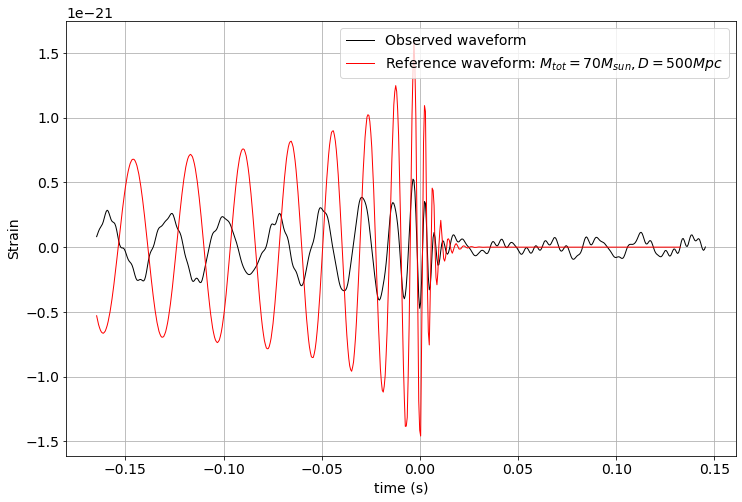

In [36]:
m = 70 #m_sun
d = 500 #Mpc
guess_t, guess_s = scale_fn(m, d, interp_fn, time, time)

#guess_t, guess_s = scale_func(m, d, time, time, reftime, refstrain)
plt.figure(20)
plt.plot(time, strain, 'k-', linewidth = 1, label = 'Observed waveform')
plt.plot(guess_t,guess_s, 'r-', linewidth = 1, label = 'Reference waveform: $M_{tot} = 70M_{sun}, D = 500Mpc$')
plt.xlabel('time (s)')
plt.ylabel('Strain')
plt.legend(loc = 'best')
plt.grid()

This is better. Increasing D gradually acquired a result of 1650Mpc:

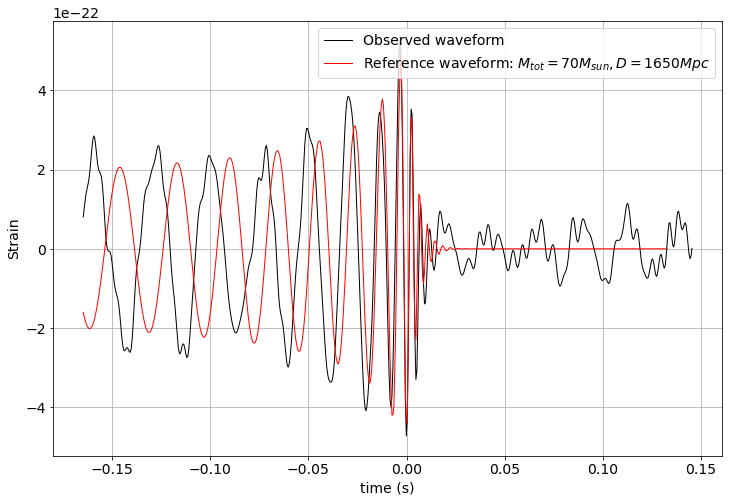

In [37]:
m = 70 #m_sun
d = 1650 #Mpc
guess_t, guess_s = scale_fn(m, d, interp_fn, time, time)

plt.figure(21)
plt.plot(time, strain, 'k-', linewidth = 1, label = 'Observed waveform')
plt.plot(guess_t,guess_s, 'r-', linewidth = 1, label = 'Reference waveform: $M_{tot} = 70M_{sun}, D = 1650Mpc$')
plt.xlabel('time (s)')
plt.ylabel('Strain')
plt.legend(loc = 'best')

plt.grid()

Next I need to increase the mass so the frequencies match. My first guess will be 75M_sun:

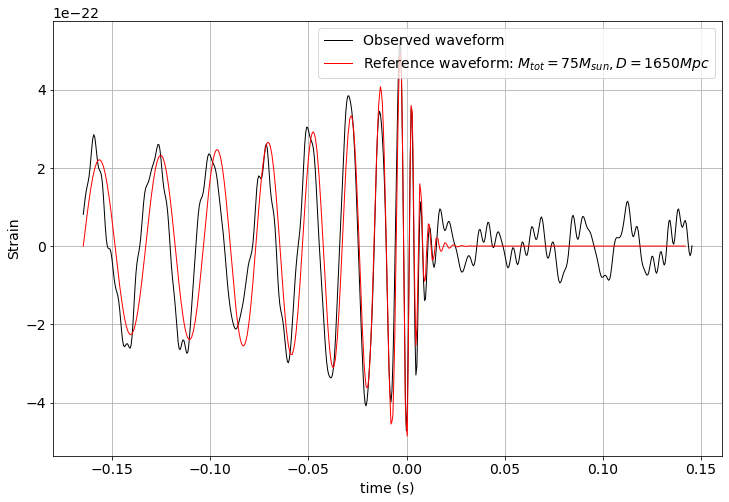

In [38]:
m = 75 #m_sun
d = 1650 #Mpc
guess_t, guess_s = scale_fn(m, d, interp_fn, time, time)

#guess_t, guess_s = scale_func(m, d, time, time, reftime, refstrain)
plt.figure(22)
plt.plot(time, strain, 'k-', linewidth = 1, label = 'Observed waveform')
plt.plot(guess_t,guess_s, 'r-', linewidth = 1, label = 'Reference waveform: $M_{tot} = 75M_{sun}, D = 1650Mpc$')
plt.xlabel('time (s)')
plt.ylabel('Strain')
plt.legend(loc = 'best')

plt.grid()

This was extremely close - changing the mass until it fit well gave me $M = 77M_{\rm{sun}}$.

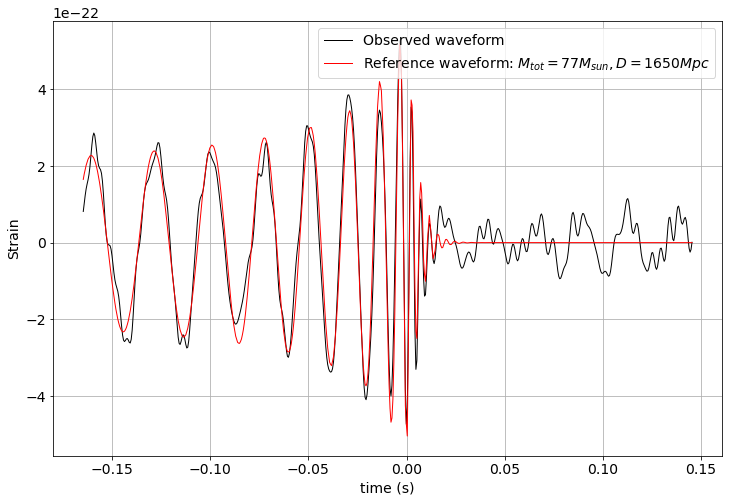

In [39]:
m = 77#m_sun
d = 1650 #Mpc
guess_t, guess_s = scale_fn(m, d, interp_fn, time, time)

#guess_t, guess_s = scale_func(m, d, time, time, reftime, refstrain)
plt.figure(22)
plt.plot(time, strain, 'k-', linewidth = 1, label = 'Observed waveform')
plt.plot(guess_t,guess_s, 'r-', linewidth = 1, label = 'Reference waveform: $M_{tot} = 77M_{sun}, D = 1650Mpc$')
plt.xlabel('time (s)')
plt.ylabel('Strain')
plt.legend(loc = 'best')

plt.grid()

This result would suggest that the gravitational wave event that created this waveform had a total mass of $77 +/- 5M_{\rm{sun}}$ and is situated at a distance of $1650 +/- 100Mpc$.

***

## Part E - Estimating the total mass using MCMC 

Now that we know how to make the scaled reference (ie 40Msun,1Mpc template file) and the observed data have the same time sampling, we can use MCMC to find out the mass and distance of the system that merged together to create the waveform (the data) we see.  You have two options in this question, each option is worth a different amount of marks.

1. Choose **one** out of the following options and create an MCMC to sample the parameter(s). <br>

    **Option 1.** Use MCMC to sample the **total mass** and find the "best value". <div align="right">**[20 marks]**</div> 

    **OR**

    **Option 2.**  Use MCMC to sample the **total mass and distance** to find the "best values".  <div align="right">**[40 marks]**</div> 
    



3. Report the median and 90% credible limits on your value of $M$ and comment on your values. Compare the waveform generated from your MCMC result with the observed waveform.   <div align="right">**[15 marks]**</div> <br>
 
You may assume that:
- the noise is described by a Gaussian distribution, 
- the total mass of the system is in the range [20,100] $M_{sun}$.
- Think carefully about what the likelihood function will be in this case (see Chapters 6-9) since we are trying to find out how good our model is matching the data.  

_Hints:_
 
 * _You should work with "log(Likelihood)" to avoid numerical errors  - note this will affect both your posterior and the step in the MCMC chain where we usually write $p_{\rm proposed}/p_{\rm current}$_

 * _The step size between samples of the MCMC is quite important. A suggested value is $0.1\,M_{sun}$_
 
 * _The initial guess of your mass is also very important. You may find yourself getting into a local minimum rather than your code finding the true minimum. You could always start close to the estimate from Part D3._
 
 * _Test your MCMC on a small number of samples (e.g. 10-100) before trying it with a larger number (e.g. $10^5$ or $10^6$)_
 
 * _At the end, ask yourself if you need to include every sample?_
 
 * _Depending on your step size, this part can take a long time to run. Suggest that you move all your plotting routines to a different code cell to save you re-running everything 10000s of times when you just want to change a plot command._
 
 * _To find out how long it will take for a Jupyter notebook to compile the MCMC code cell, add the following snippet to your code before you go into your MCMC loop (where Nsteps is the number of steps your MCMC is using):_
 
```def time_spent_waiting(n):
    from datetime import datetime,timedelta
    preddur=[n*0.01,n*0.02]
    print('predicted duration: {:.2f}-{:.2f} mins'.format(preddur[0]/60.,preddur[1]/60.))
    return```

## Answer:

So I need to use the MCMC chain to first determine the mass and distance of the system that merged and created the observed waveform data.

Recalling the scaling function:

```
def scale_fn(M, D, interp_fn, t):
    m_ref = 40
    d_ref = 1 
    t_ref = (m_ref * t) / M
    h = (M * d_ref * interp_fn(t_ref))/(m_ref * D) 
    return t, h
```

And knowing that the log likelihood for chi-square is given by

$ \mbox{log likelihood} = -0.5 \dfrac{\sum(y_i-y_{\rm model})^2}{\sigma^2}$
 
I can create a function to find the log likelihood using the waveform strain data for the $ y_{\rm{model}}$ variable.

In [40]:
def log_like_mass(theta_mass):
    model = scale_fn(theta_mass, 1650, interp_fn, time, time)
    return -0.5*((np.sum((strain - model[1])**2)) / ((np.std(strain))**2))

Now for a posterior function. In this case, there is no prior. As you're not assuming anything, you just take the log likelihood. A function isn't *really* needed for this, but I'm including it for clarity:

In [41]:
def posterior_mass(theta_mass): 
    post_mass = log_like_mass(theta_mass)
    return post_mass

Now the required functions have been created, it's on to the prep for the MCMC.

The first steps are:

1. To determine a step number
2. Set up an empty array to record the evolution of $\theta$
3. Set a step size, $\sigma_{\rm {MCMC}}$
4. Determine an initial guess for $\theta$

In [42]:
N_MCMC_mass = 5000
theta_curr_mass = np.zeros(N_MCMC_mass + 1) 
sigma_MCMC_mass = 0.1
theta_curr_mass[0] = 78

Now to go ahead with the MCMC.

In [43]:
for i in range(N_MCMC_mass):
    
    #Put the current theta into the posterior function
    #to get the current probability:
    p_curr = posterior_mass(theta_curr_mass[i])
    
    #Acquire a random theta value to try:
    d_theta_mass = np.random.normal(0,sigma_MCMC_mass)
    
    #New theta guess = random value + stepsize:
    theta_prop_mass = theta_curr_mass[i] + d_theta_mass
    
    #As before, use the posterior function to get a new 
    #probability with the new theta:
    p_prop = posterior_mass(theta_prop_mass)
    
    #If the new probability is greater than the previous probability, keep it:
    if p_prop > p_curr: 
        theta_curr_mass[i+1] = theta_prop_mass
    else:
    #If it's lower, use the ratios of the probabilities to find the
    #probability of whether we move to that value or not
        p_newmove_mass = np.exp(p_prop - p_curr)
        
        #Generate a random number for probability
        u_random_mass = np.random.uniform(0,1)
        
        #If u_random_mass < p_newmove_mass, then accept. 
        #If not, reject it
        if u_random_mass <= p_newmove_mass:
            theta_curr_mass[i+1] = theta_prop_mass
        else:
            theta_curr_mass[i+1] = theta_curr_mass[i]

Finally, to get the mean and standard deviation from ```theta_curr_mass```:

In [44]:
mean_mass = np.mean(theta_curr_mass)
std_mass = np.std(theta_curr_mass)
print('From the MCMC, the mean mass is {:.3f} \u00B1 {:.3f} solar masses.'.format(mean_mass, std_mass))

From the MCMC, the mean mass is 77.021 ± 0.186 solar masses.


Judging from my by-eye estimate in the previous part, this seems to be correct. Now to do the same for the distance:

*(As this is just a repeat of mass but slightly changing parameters, all of the code is in one cell.)*

In [45]:
def log_like_dist(theta_dist):
    #Here, the mass used is the one determined previously:
    model = scale_fn(mean_mass, theta_dist, interp_fn, time, time)
    return -0.5*((np.sum((strain - model[1])**2)) / ((np.std(strain))**2))
                  
def posterior_dist(theta_dist): 
    post_dist = log_like_dist(theta_dist)
    return post_dist

N_MCMC_dist = 5000
theta_curr_dist = np.zeros(N_MCMC_dist + 1) 
#Step size has also changed for distance:
sigma_MCMC_dist = 100
theta_curr_dist[0] = 1800

for i in range(N_MCMC_dist):
    
    #Put the current theta into the posterior function
    #to get the current probability:
    p_curr = posterior_dist(theta_curr_dist[i])
    
    #Acquire a random theta value to try:
    d_theta_dist = np.random.normal(0,sigma_MCMC_dist)
    
    #New theta guess = random value + stepsize:
    theta_prop_dist = theta_curr_dist[i] + d_theta_dist
    
    #As before, use the posterior function to get a new 
    #probability with the new theta:
    p_prop = posterior_dist(theta_prop_dist)
    
    #If the new probability is greater than the previous probability, keep it:
    if p_prop > p_curr: 
        theta_curr_dist[i+1] = theta_prop_dist
    else:
    #If it's lower, use the ratios of the probabilities to find the
    #probability of whether we move to that value or not
        p_newmove_dist = np.exp(p_prop - p_curr)
        
        #Generate a random number for probability
        u_random_dist = np.random.uniform(0,1)
        
        #If u_random_dist < p_newmove_dist, then accept. 
        #If not, reject it
        if u_random_dist <= p_newmove_dist:
            theta_curr_dist[i+1] = theta_prop_dist
        else:
            theta_curr_dist[i+1] = theta_curr_dist[i]
            
mean_dist = np.mean(theta_curr_dist)
std_dist = np.std(theta_curr_dist)
print('From the MCMC, the mean distance is {:.4f} \u00B1 {:.4f} MPc.'.format(mean_dist, std_dist))

From the MCMC, the mean distance is 1717.3839 ± 70.7563 MPc.


Again, comparing to my by-eye estimate, I believe the MCMC was successful. Now to plot.

2.  Display the results in an appropriate manner and comment on your findings, as well as your results from the MCMC. Has your MCMC converged? <div align="right">**[20 marks]**</div>

## Answer:

First, I need to create an array to plot against theta to show its evolution:

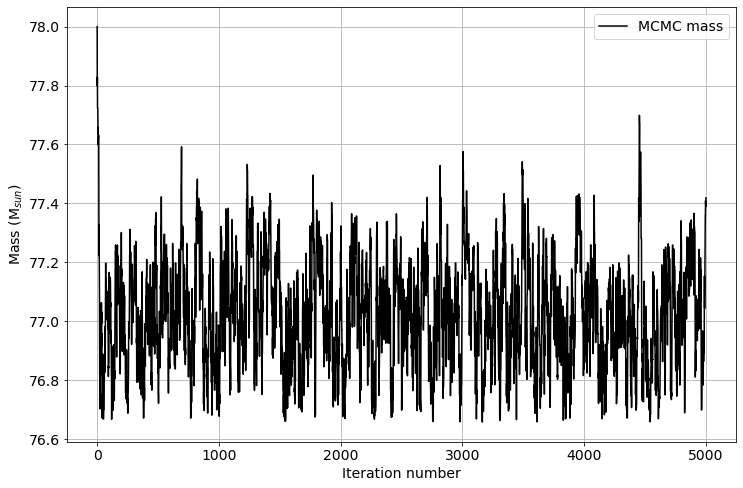

In [46]:
x_MCMC_mass = np.linspace(0, N_MCMC_mass, N_MCMC_mass + 1)
plt.figure(23)
plt.plot(x_MCMC_mass, theta_curr_mass, 'k-', label = 'MCMC mass')
plt.xlabel('Iteration number')
plt.ylabel('Mass (M$_{sun}$)')
plt.grid()
plt.legend(loc = 'best')

Now, a histogram plot to better visualise the mean:

Text(0, 0.5, 'Probability density')

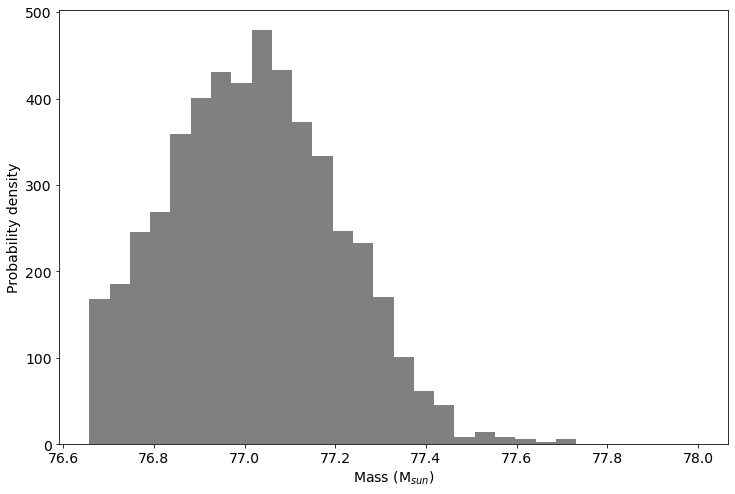

In [47]:
plt.figure(24)
plt.hist(theta_curr_mass, bins = 30, color = 'grey')
plt.xlabel('Mass (M$_{sun}$)')
plt.ylabel('Probability density')

As mentioned above, from the MCMC the mean mass is 77.014 ± 0.172 solar masses. The graphs above show the MCMC converging around this point, thus proving statistically that given the data observed, this mass is close, if not correct.

**However**, it's important to note the burn-in. This is where the first values are furthest away from the true mean. This can skew the mean value, so I will re-calculate while not considering the first 100 points:

In [48]:
burn_mass = theta_curr_mass[100:]
burn_mean = np.mean(burn_mass)
burn_std = np.std(burn_mass)
print('From the MCMC, the mean mass is {:.3f} \u00B1 {:.3f} solar masses.'.format(mean_mass, std_mass))
print('When ignoring the first 1000 points to account for '
      'burn in, the mean mass is {:.3f} \u00B1 {:.3f} solar masses.'.format(burn_mean, burn_std))

From the MCMC, the mean mass is 77.021 ± 0.186 solar masses.
When ignoring the first 1000 points to account for burn in, the mean mass is 77.021 ± 0.183 solar masses.


There isn't a huge difference, but in some cases the smallest change can be crucial, so it's best to consider it.

Now for distance.

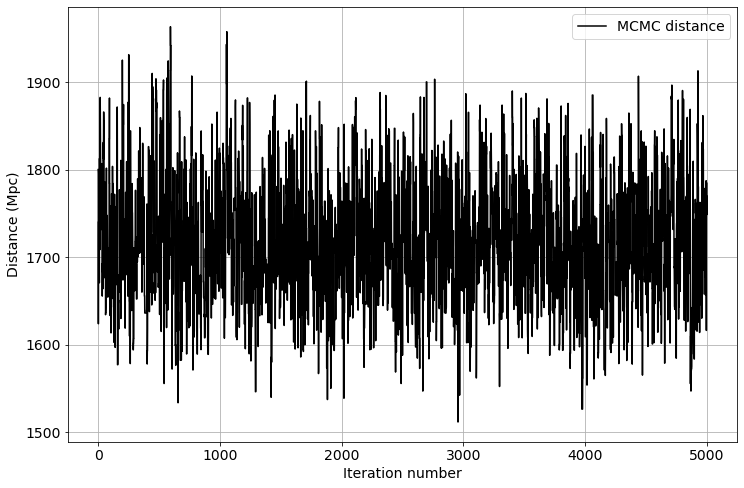

In [49]:
x_MCMC_dist = np.linspace(0, N_MCMC_dist, N_MCMC_dist + 1)
plt.figure(25)
plt.plot(x_MCMC_dist, theta_curr_dist, 'k-', label = 'MCMC distance')
plt.xlabel('Iteration number')
plt.ylabel('Distance (Mpc)')
plt.grid()
plt.legend(loc = 'best')

Text(0, 0.5, 'Probability density')

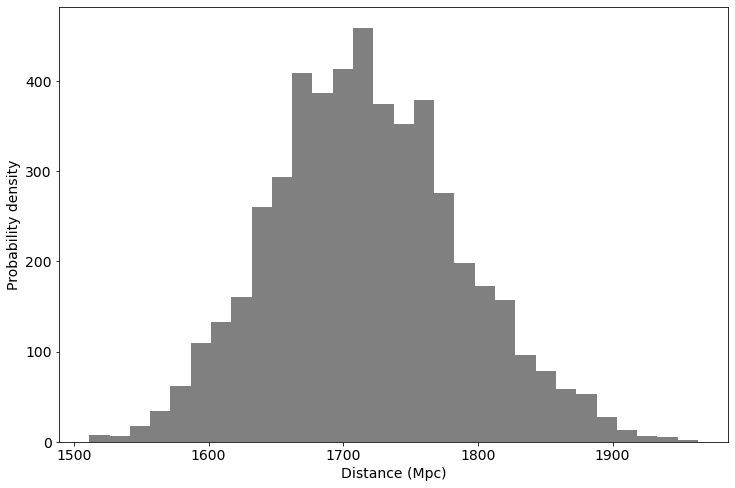

In [50]:
plt.figure(26)
plt.hist(theta_curr_dist, bins = 30, color = 'grey')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Probability density')

Again, these graphs, as well as the MCMC itself, seem to support my by-eye estimate. 

In addition, this MCMC doesn't seem to need the burn-in as the starting value was close enough to the mean.

***

## Part F - Putting it all together 

If you are unable to get the MCMC in Part E working, please use your mass and distance estimate from the by-eye fit in part D3. 

If your MCMC is working, please use your mass from the MCMC and by eye estimate of distance from Part D3 (option 1) **or** your mass and distance estimate from the MCMC (option 2).

1. Estimate the chirp mass for your system and the individual masses of your merging bodies, describing your reasoning. Comment on your individual masses. <div align="right">**[5 marks]**</div><br>

## Answer:

The Chirp mass the effective mass of the binary system, and is given by:

$$M_{ch} = \dfrac{(M_1 M_2)^{3/5}}{(M_1 + M_2)^{1/5}}.$$

Note that we have been using the fact that $M_1 = M_2$ for this assignment, so the equation reduces to:

$$M_{ch} = \dfrac{(M^2)^{3/5}}{(2M)^{1/5}},$$

where $M$ is the mass of one object.

To find $M$, I will halve the mean and then put it into a function for chirp mass:

In [51]:
def chirp(m1, m2):
    return ((m1 * m2)**(3/5))/((m1 + m2)**(1/5))
one_obj_mass = mean_mass / 2
chirp_mass = chirp(one_obj_mass, one_obj_mass)
print('The estimated chirp mass for this system is {:.3f}.'.format(chirp_mass))

The estimated chirp mass for this system is 33.526.


2. Plot your MCMC derived properties alongside the previously discovered gravitational wave systems. <div align="right">**[5 marks]**</div><br>
 
## Answer:

Back to the first part of this assignment. I'll plot the original data, then my data in a different colour:

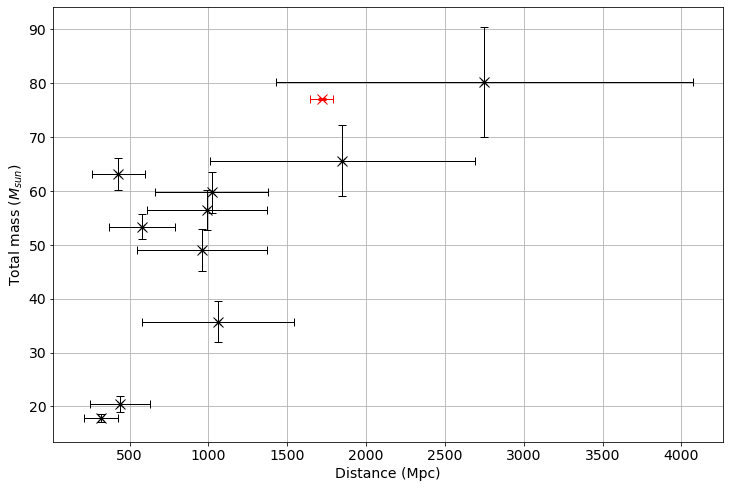

In [52]:
plt.figure(27)
plt.plot(distance, mtot, 'kx', markersize=10)
plt.errorbar(distance, mtot, yerr = mtot_err, xerr=dist_err, fmt='kx', elinewidth = 1, capsize = 4)
plt.plot(mean_dist, mean_mass, 'rx', markersize = 10)
plt.errorbar(mean_dist, mean_mass, yerr = std_mass, xerr = std_dist, fmt = 'rx', elinewidth = 1, capsize = 4)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Total mass ($M_{sun}$)')
plt.grid()

My point on the graph just shows that the errors should actually be much larger. Realistically, there are a lot more things that affect the mass and distance, thus more room for error.

3. Estimate the period from your observed waveform around the peak amplitude of the wave. <div align="right">**[12 marks]**</div><br>

## Answer:

One orbital period of a gravitational wave is two periods of the GW signal. This is due to the fact that after half a revolution, the two objects have just swapped their positions. The second half of the orbit repeats the motion pattern of the first half, and the gravitational wave signal is repeated.

Recall the reference waveform that I fit to the observational data, zoomed into the peak amplitude:

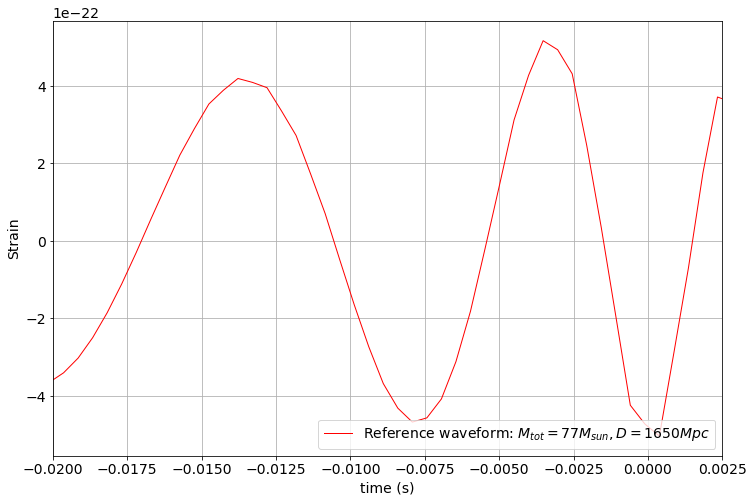

In [53]:
plt.figure(28)
plt.plot(guess_t,guess_s, 'r-', linewidth = 1, label = 'Reference waveform: $M_{tot} = 77M_{sun}, D = 1650Mpc$')
plt.xlabel('time (s)')
plt.ylabel('Strain')
plt.legend(loc = 'lower right')
plt.xlim(-0.02, 0.0025)
plt.grid()

Looking at the graph and taking the start of the first period to be around $t_{start} = -0.017s$ (where strain is 0), and the end of the second period to be around $t_{end} = 0.0015s$, that would make the orbital period to be ~$0.0185s$.

4. Assuming that the objects are not spinning, and that their orbits are Keplerian and essentially circular, use your period to estimate the orbital separation in **km** of the two bodies around peak amplitude. Think carefully about how the orbital period is related to the period of your gravitational wave.    <div align="right">**[10 marks]**</div><br>

## Answer:

If the objects are not spinning and they are in circular Keplerian orbits until the merger, the orbital separation $R$ of the two objects just before merger (peak amplitude of waveform) would be:

$R = \left(\dfrac{G (M_1+M_2)}{\omega_{\rm max}^2}\right)^{1/3}.$

The equation relating $\omega$ to the orbital period is:

$\omega = \dfrac{2\pi}{t}$.

In [55]:
def R(G, m1, m2, omega):
    return (((G)* (m1 + m2))/(omega**2))**(1/3)

G = 6.67e-11
t = 0.0185
omega = (2 * np.pi)/t
m1 = one_obj_mass * 1.99e30
m2 = one_obj_mass * 1.99e30

r = R(G, m1, m2, omega) / 1000

print('The orbital separation of the two objects is {:.3e}km.'.format(r))

The orbital separation of the two objects is 4.459e+02km.


5. Comment on what your analysis suggests are the best astrophysical candidates for the merging objects? <div align="right">**[4 marks]**</div>

## Answer:

A neutron star's mass limit is only $2.16M_{sun}$. With an estimated total mass of around $77M_{sun}$, plus the assumption that the objects are of the same mass (a symmetrical binary system), the likely candicate for this merger event is BBH (binary black hole). These are also the most frequently discovered. (The other possible events are NSBH (neutron star and black hole) and BNS (binary neutron star)).

***

## Part G - Understanding, Presentation and Interpretation

An additional 20 marks will be awarded for evidence of understanding and knowledge via (for example) explanations, plots, comments on your results and well formatted and well explained results. Marks are also available for additional investigations carried out on your analysis above. These marks are available for those data analysis reports that show evidence of work that is *very high quality* or *outstanding* as per the decile descriptions in the Assessment Criteria for modules. <div align="right">**[20 marks]**</div>